In [1]:
##### Diffusion in Koch-like boundary @ YYE
##### April 2023
##### Generate Koch triangle with arbitraty angles
##### Diffusion and contact PDF.

import numpy as np
import matplotlib.pyplot as plt
import math, random
from itertools import cycle
import copy



In [24]:
file2 = open("pbbN1e6g2.txt")
print(file2.readable())

True


In [25]:
contt = file2.read()

In [103]:
pk3 = [           1,   2.6200000000000003E-004,
           2,   2.8899999999999998E-004,
           3,   4.1599999999999997E-004,
           4,   3.5609999999999999E-003,
           5,   4.1539999999999997E-003,
           6,   6.5499999999999998E-004,
           7,   4.0999999999999999E-004,
           8,   3.5199999999999999E-004,
           9,   3.6999999999999999E-004,
          10,   4.6400000000000000E-004,
          11,   7.3399999999999995E-004,
          12,   7.3540000000000003E-003,
          13,   1.7364999999999998E-002,
          14,   6.3270000000000002E-003,
          15,   7.0860000000000003E-003,
          16,   3.3688000000000003E-002,
          17,   3.3635999999999999E-002,
          18,   7.0640000000000000E-003,
          19,   6.4000000000000003E-003,
          20,   1.7568000000000000E-002,
          21,   7.3270000000000002E-003,
          22,   6.9899999999999997E-004,
          23,   4.3199999999999998E-004,
          24,   3.7500000000000001E-004,
          25,   3.6099999999999999E-004,
          26,   3.8200000000000002E-004,
          27,   5.9199999999999997E-004,
          28,   4.1729999999999996E-003,
          29,   3.4759999999999999E-003,
          30,   4.2999999999999999E-004,
          31,   3.4200000000000002E-004,
          32,   2.8299999999999999E-004,
          33,   2.4300000000000000E-004,
          34,   3.0299999999999999E-004,
          35,   4.9299999999999995E-004,
          36,   3.6800000000000001E-003,
          37,   4.1339999999999997E-003,
          38,   5.9100000000000005E-004,
          39,   4.0999999999999999E-004,
          40,   3.6299999999999999E-004,
          41,   3.7700000000000000E-004,
          42,   4.6200000000000001E-004,
          43,   7.2300000000000001E-004,
          44,   7.1840000000000003E-003,
          45,   1.7415000000000000E-002,
          46,   6.2610000000000001E-003,
          47,   7.2379999999999996E-003,
          48,   3.3485000000000001E-002,
          49,   3.3020000000000001E-002,
          50,   6.9880000000000003E-003,
          51,   6.2989999999999999E-003,
          52,   1.7361000000000001E-002,
          53,   7.1900000000000002E-003,
          54,   6.8499999999999995E-004,
          55,   4.6200000000000001E-004,
          56,   3.3199999999999999E-004,
          57,   3.6699999999999998E-004,
          58,   4.1199999999999999E-004,
          59,   6.2399999999999999E-004,
          60,   4.1830000000000001E-003,
          61,   3.7109999999999999E-003,
          62,   4.3100000000000001E-004,
          63,   2.9100000000000003E-004,
          64,   2.1900000000000001E-004,
          65,   2.2200000000000000E-004,
          66,   2.9100000000000003E-004,
          67,   4.8799999999999999E-004,
          68,   3.6120000000000002E-003,
          69,   4.0870000000000004E-003,
          70,   6.0300000000000002E-004,
          71,   4.4299999999999998E-004,
          72,   3.4699999999999998E-004,
          73,   3.7399999999999998E-004,
          74,   4.2099999999999999E-004,
          75,   7.0699999999999995E-004,
          76,   7.2210000000000000E-003,
          77,   1.7658000000000000E-002,
          78,   6.3369999999999998E-003,
          79,   7.0689999999999998E-003,
          80,   3.3313000000000002E-002,
          81,   3.3280999999999998E-002,
          82,   7.0179999999999999E-003,
          83,   6.4429999999999999E-003,
          84,   1.7698999999999999E-002,
          85,   7.2589999999999998E-003,
          86,   7.2999999999999996E-004,
          87,   4.3300000000000001E-004,
          88,   3.4900000000000003E-004,
          89,   3.4400000000000001E-004,
          90,   4.0400000000000001E-004,
          91,   6.4199999999999999E-004,
          92,   4.1949999999999999E-003,
          93,   3.6219999999999998E-003,
          94,   4.9700000000000005E-004,
          95,   2.8100000000000000E-004,
          96,   2.2900000000000001E-004,
          97,   2.1800000000000001E-004,
          98,   2.9100000000000003E-004,
          99,   4.9299999999999995E-004,
         100,   3.6140000000000000E-003,
         101,   4.1640000000000002E-003,
         102,   6.6900000000000000E-004,
         103,   4.2900000000000002E-004,
         104,   3.8299999999999999E-004,
         105,   3.7700000000000000E-004,
         106,   4.0900000000000002E-004,
         107,   6.9800000000000005E-004,
         108,   7.1720000000000004E-003,
         109,   1.7739000000000001E-002,
         110,   6.2779999999999997E-003,
         111,   6.9300000000000004E-003,
         112,   3.3558999999999999E-002,
         113,   3.3326000000000001E-002,
         114,   6.9849999999999999E-003,
         115,   6.4070000000000004E-003,
         116,   1.7645999999999998E-002,
         117,   7.0520000000000001E-003,
         118,   7.0399999999999998E-004,
         119,   4.5399999999999998E-004,
         120,   3.7100000000000002E-004,
         121,   3.7199999999999999E-004,
         122,   4.0800000000000000E-004,
         123,   6.0899999999999995E-004,
         124,   4.2570000000000004E-003,
         125,   3.6779999999999998E-003,
         126,   4.4600000000000000E-004,
         127,   2.8499999999999999E-004,
         128,   2.5099999999999998E-004,
         129,   2.5599999999999999E-004,
         130,   3.1399999999999999E-004,
         131,   4.8400000000000000E-004,
         132,   3.5810000000000000E-003,
         133,   4.2160000000000001E-003,
         134,   5.6599999999999999E-004,
         135,   4.1700000000000000E-004,
         136,   3.5300000000000002E-004,
         137,   3.5900000000000000E-004,
         138,   4.2099999999999999E-004,
         139,   7.0200000000000004E-004,
         140,   7.1999999999999998E-003,
         141,   1.7479999999999999E-002,
         142,   6.4409999999999997E-003,
         143,   7.0410000000000004E-003,
         144,   3.3549000000000002E-002,
         145,   3.3388000000000001E-002,
         146,   7.1640000000000002E-003,
         147,   6.2940000000000001E-003,
         148,   1.7472999999999999E-002,
         149,   7.2960000000000004E-003,
         150,   7.5600000000000005E-004,
         151,   4.1899999999999999E-004,
         152,   3.5199999999999999E-004,
         153,   3.4800000000000000E-004,
         154,   4.2400000000000001E-004,
         155,   6.3800000000000000E-004,
         156,   4.1840000000000002E-003,
         157,   3.5400000000000002E-003,
         158,   4.7199999999999998E-004,
         159,   2.7099999999999997E-004,
         160,   2.2900000000000001E-004,
         161,   2.5099999999999998E-004,
         162,   2.7099999999999997E-004,
         163,   4.5399999999999998E-004,
         164,   3.6679999999999998E-003,
         165,   4.2459999999999998E-003,
         166,   6.0499999999999996E-004,
         167,   3.9500000000000001E-004,
         168,   3.6600000000000001E-004,
         169,   3.6800000000000000E-004,
         170,   4.2800000000000000E-004,
         171,   7.2099999999999996E-004,
         172,   7.1869999999999998E-003,
         173,   1.7451999999999999E-002,
         174,   6.4539999999999997E-003,
         175,   7.0499999999999998E-003,
         176,   3.3447999999999999E-002,
         177,   3.3449000000000000E-002,
         178,   7.0939999999999996E-003,
         179,   6.3020000000000003E-003,
         180,   1.7510999999999999E-002,
         181,   7.4700000000000001E-003,
         182,   7.2000000000000005E-004,
         183,   4.7300000000000000E-004,
         184,   3.8400000000000001E-004,
         185,   3.5100000000000002E-004,
         186,   4.2700000000000002E-004,
         187,   6.5300000000000004E-004,
         188,   4.2009999999999999E-003,
         189,   3.7050000000000000E-003,
         190,   4.4700000000000002E-004,
         191,   3.0400000000000002E-004,
         192,   2.5999999999999998E-004]

pk2 = [           1,   4.4720000000000003E-003,
           2,   5.3959999999999998E-003,
           3,   8.5319999999999997E-003,
           4,   6.4933000000000005E-002,
           5,   6.4827999999999997E-002,
           6,   8.5430000000000002E-003,
           7,   5.4070000000000003E-003,
           8,   4.4830000000000000E-003,
           9,   4.5480000000000000E-003,
          10,   5.4450000000000002E-003,
          11,   8.6070000000000001E-003,
          12,   6.4685999999999994E-002,
          13,   6.5115999999999993E-002,
          14,   8.7440000000000000E-003,
          15,   5.3699999999999998E-003,
          16,   4.4359999999999998E-003,
          17,   4.4039999999999999E-003,
          18,   5.5329999999999997E-003,
          19,   8.8430000000000002E-003,
          20,   6.4714999999999995E-002,
          21,   6.4249000000000001E-002,
          22,   8.4960000000000001E-003,
          23,   5.4110000000000000E-003,
          24,   4.4419999999999998E-003,
          25,   4.5529999999999998E-003,
          26,   5.3720000000000000E-003,
          27,   8.6029999999999995E-003,
          28,   6.4685999999999994E-002,
          29,   6.4869999999999997E-002,
          30,   8.5410000000000000E-003,
          31,   5.4990000000000004E-003,
          32,   4.4370000000000000E-003,
          33,   4.5519999999999996E-003,
          34,   5.4419999999999998E-003,
          35,   8.6309999999999998E-003,
          36,   6.4875000000000002E-002,
          37,   6.4832000000000001E-002,
          38,   8.5740000000000000E-003,
          39,   5.5469999999999998E-003,
          40,   4.6080000000000001E-003,
          41,   4.4019999999999997E-003,
          42,   5.3740000000000003E-003,
          43,   8.6060000000000008E-003,
          44,   6.4875000000000002E-002,
          45,   6.4891000000000004E-002,
          46,   8.5009999999999999E-003,
          47,   5.5579999999999996E-003,
          48,   4.5319999999999996E-003]

pk1 = [           1,   8.3599000000000007E-002,
           2,   8.3401000000000003E-002,
           3,   8.3354999999999999E-002,
           4,   8.3374000000000004E-002,
           5,   8.3378999999999995E-002,
           6,   8.3650000000000002E-002,
           7,   8.3377000000000007E-002,
           8,   8.3082000000000003E-002,
           9,   8.2807000000000006E-002,
          10,   8.3559999999999995E-002,
          11,   8.3136000000000002E-002,
          12,   8.3280000000000007E-002]


pk0 = [1,  0.33381899999999998,
           2,  0.33322499999999999,
           3,  0.33295599999999997]

In [98]:
len(pk3sum)

96

In [108]:
pk3sum = np.zeros(len(pk3)//4)
pk2sum = np.zeros(len(pk2)//4)
pk1sum = np.zeros(len(pk1)//4)

In [109]:
for i in range(len(pk3)//4):
    if i%2!=0:
        u = 0.0
        for j in range(4*i-3,4*i+5,2):
            u += pk3[j]
        pk3sum[i] = u
    else:
        u = i//2
        pk3sum[i] = u + 1

In [110]:
for i in range(len(pk2)//4):
    if i%2!=0:
        u = 0.0
        for j in range(4*i-3,4*i+5,2):
            u += pk2[j]
        pk2sum[i] = u
    else:
        u = i//2
        pk2sum[i] = u + 1

In [111]:
for i in range(len(pk1)//4):
    if i%2!=0:
        u = 0.0
        for j in range(4*i-3,4*i+5,2):
            u += pk1[j]
        pk1sum[i] = u
    else:
        u = i//2
        pk1sum[i] = u + 1

In [113]:
pk1sum

array([1.      , 0.333729, 2.      , 0.333488, 3.      , 0.332783])

Below we show that pk3sum is almost equal to pk2.

<function matplotlib.pyplot.show(*args, **kw)>

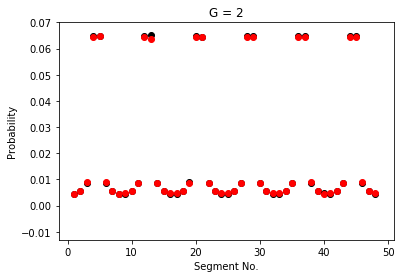

In [106]:
plt.xlabel("Segment No.")
plt.ylabel("Probability")
plt.title("G = 2")
for i in range(len(pk2)//2):
    plt.scatter(pk2[i*2],pk2[2*i+1],c='black')
    plt.scatter(pk3sum[i*2],pk3sum[2*i+1],c='red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

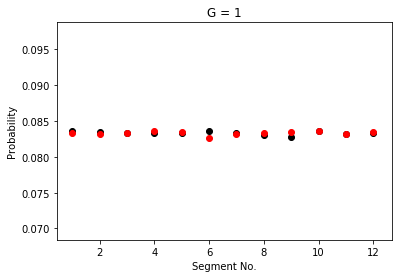

In [114]:
plt.xlabel("Segment No.")
plt.ylabel("Probability")
plt.title("G = 1")
for i in range(len(pk1)//2):
    plt.scatter(pk1[i*2],pk1[2*i+1],c='black')
    plt.scatter(pk2sum[i*2],pk2sum[2*i+1],c='red')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

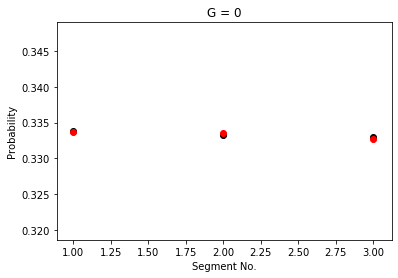

In [115]:
plt.xlabel("Segment No.")
plt.ylabel("Probability")
plt.title("G = 0")
for i in range(len(pk0)//2):
    plt.scatter(pk0[i*2],pk0[2*i+1],c='black')
    plt.scatter(pk1sum[i*2],pk1sum[2*i+1],c='red')
plt.show